# 6.  Análisis por objetivos (Objetivo Específico 3)

Modelado Predictivo (Objetivo Específico 3): Desarrollar modelos predictivos que permitan anticipar tendencias en cobertura, deserción y repitencia educativa.

## 6.1 Configuración del Entorno e Importación de Módulos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
  
sys.path.append(os.path.abspath(os.path.join('..', 'src'))),
sys.path.append(os.path.abspath(os.path.join('..', 'models'))),
sys.path.append(os.path.abspath(os.path.join('..', 'config'))),

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Importar funciones y variables desde tus módulos,
from data_loader import load_processed_data # Para cargar los datos ya limpios,
# Importar funciones de visualización,

from forecasting import(
    forecast_with_prophet,
    forecast_with_arima,
    forecast_with_linear_regression,
    forecast_with_polynomial_regression
)
from settings import (
    PROCESSED_DATA_PATH, 
    INDICADORES_CLAVES_TASAS,
    INDICADORES_PRINCIPALES_VIZ,
    FIGURES_PATH,
    INDICADORES_BOXPLOTS
   
)
from statistical_analysis import(
    perform_temporal_anova
)

## 6.2 Carga del Dataset Limpio

In [2]:
# Cargar el dataset limpio 
df_cleaned = load_processed_data(PROCESSED_DATA_PATH)

if df_cleaned is not None:
    print("✅ Datos limpios cargados exitosamente.\n")
    print(df_cleaned.head())
    print(f"Dimensiones del DataFrame limpio: {df_cleaned.shape}")
else:
    print("⛔ No se pudo cargar el DataFrame limpio.")

Intentando cargar los datos procesados desde: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\data\processed\datos_educacion_limpios.csv
Datos procesados cargados exitosamente. Dimensiones: (14582, 34)
✅ Datos limpios cargados exitosamente.

   Unnamed: 0  anio  codigo_municipio   municipio  codigo_departamento  \
0           0  2023              5001    Medellín                    5   
1           1  2023              5002   Abejorral                    5   
2           2  2023              5004    Abriaquí                    5   
3           3  2023              5021  Alejandría                    5   
4           4  2023              5030       Amagá                    5   

  departamento  codigo_etc              etc  poblacion_5_16  \
0    Antioquia      3759.0         Medellín        377562.0   
1    Antioquia      3758.0  Antioquia (ETC)          3634.0   
2    Antioquia      3758.0  Antioquia (ETC)           503.0   
3    Antioquia      3758.0  Antioquia (E

### 6.3 Modelo predictivo Prophet


--- Ejecutando forecast_with_prophet ---

📊 Modelo Prophet para: COBERTURA_NETA


07:06:42 - cmdstanpy - INFO - Chain [1] start processing
07:06:44 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Últimos valores del pronóstico:
           ds       yhat  yhat_lower  yhat_upper
11 2022-01-01  85.388167   64.059164  106.986641
12 2023-01-01  83.723127   62.695886  106.322909
13 2023-12-31  81.218389   61.449607  101.496252
14 2024-12-31  80.414629   58.992864  101.743821
15 2025-12-31  78.771739   57.094484  100.497103
 ✅ Gráfico de pronóstico guardado en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\prophet_forecast_cobertura_neta.png


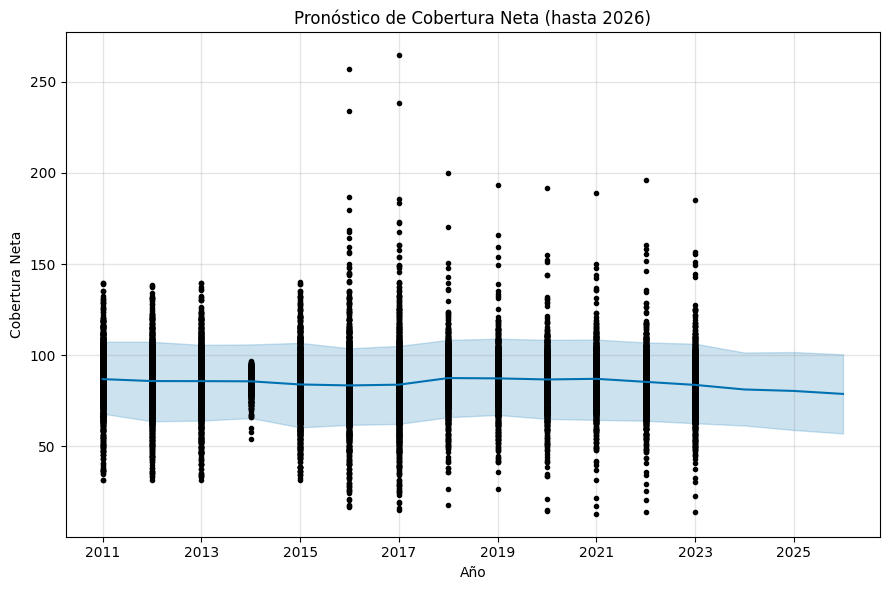

✅ Gráfico de componentes guardado en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\prophet_components_cobertura_neta.png


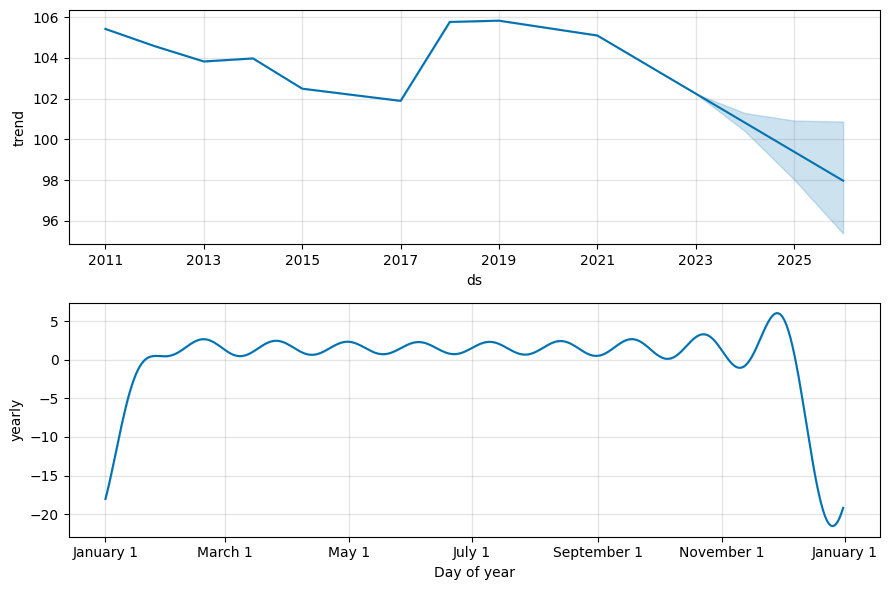


📊 Modelo Prophet para: DESERCION


07:06:46 - cmdstanpy - INFO - Chain [1] start processing
07:06:50 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Últimos valores del pronóstico:
           ds      yhat  yhat_lower  yhat_upper
11 2022-01-01  3.930412    1.112274    6.396471
12 2023-01-01  3.799947    1.044701    6.357029
13 2023-12-31  3.878762    1.308782    6.542859
14 2024-12-31  3.538064    0.694213    6.346335
15 2025-12-31  3.406518    0.816135    6.459365
 ✅ Gráfico de pronóstico guardado en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\prophet_forecast_desercion.png


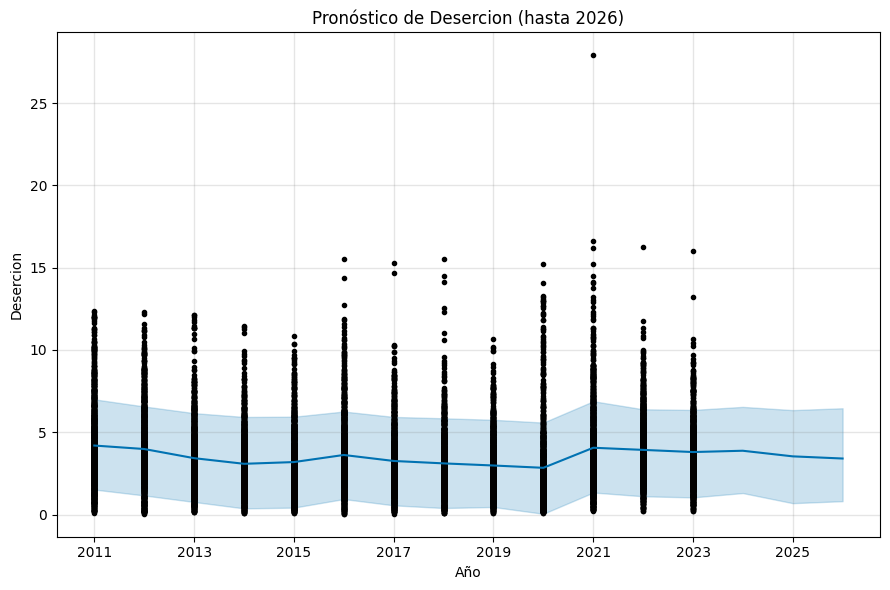

✅ Gráfico de componentes guardado en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\prophet_components_desercion.png


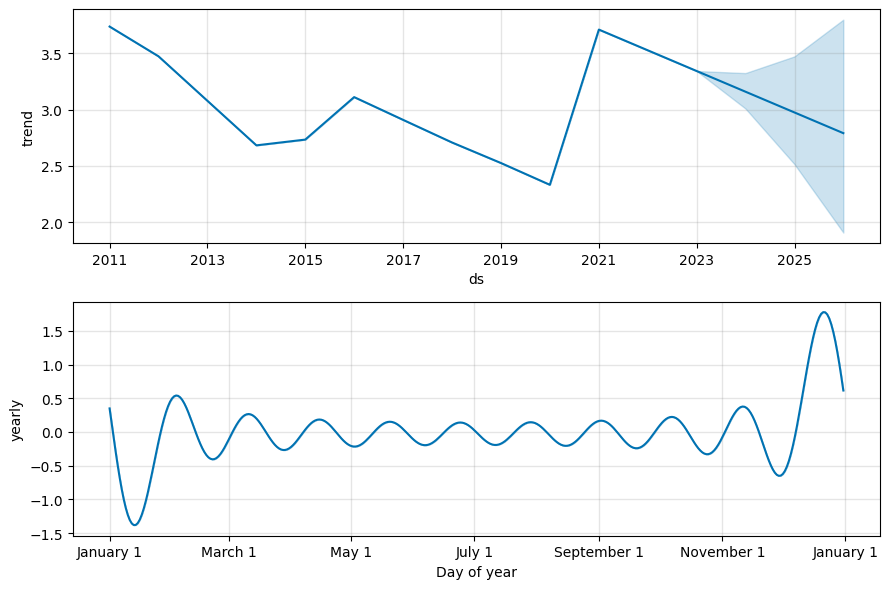


📊 Modelo Prophet para: APROBACION


07:06:52 - cmdstanpy - INFO - Chain [1] start processing
07:06:54 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Últimos valores del pronóstico:
           ds       yhat  yhat_lower  yhat_upper
11 2022-01-01  89.485405   83.248818   95.348419
12 2023-01-01  89.788558   83.873237   96.502068
13 2023-12-31  90.405442   84.015464   95.952994
14 2024-12-31  90.394332   84.183945   96.283199
15 2025-12-31  90.696764   83.973599   97.160778
 ✅ Gráfico de pronóstico guardado en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\prophet_forecast_aprobacion.png


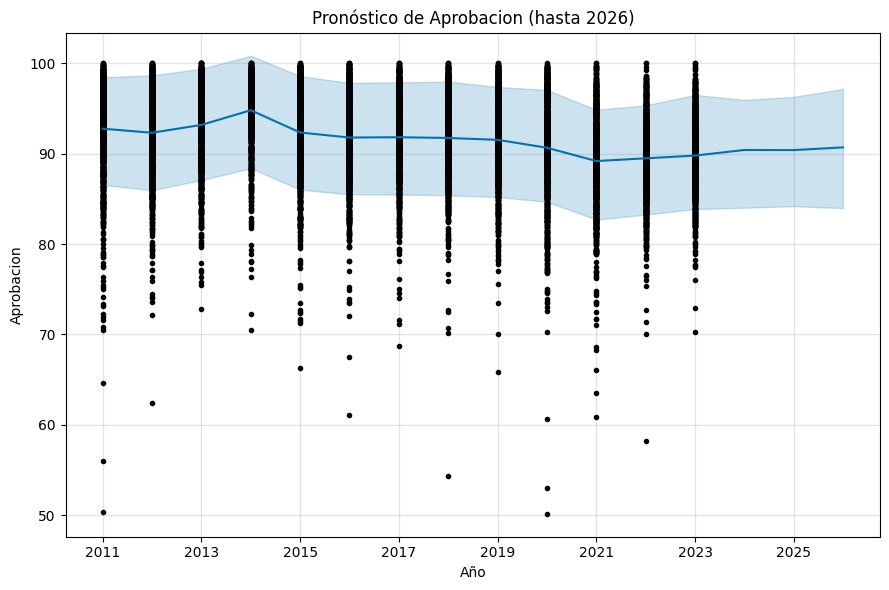

✅ Gráfico de componentes guardado en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\prophet_components_aprobacion.png


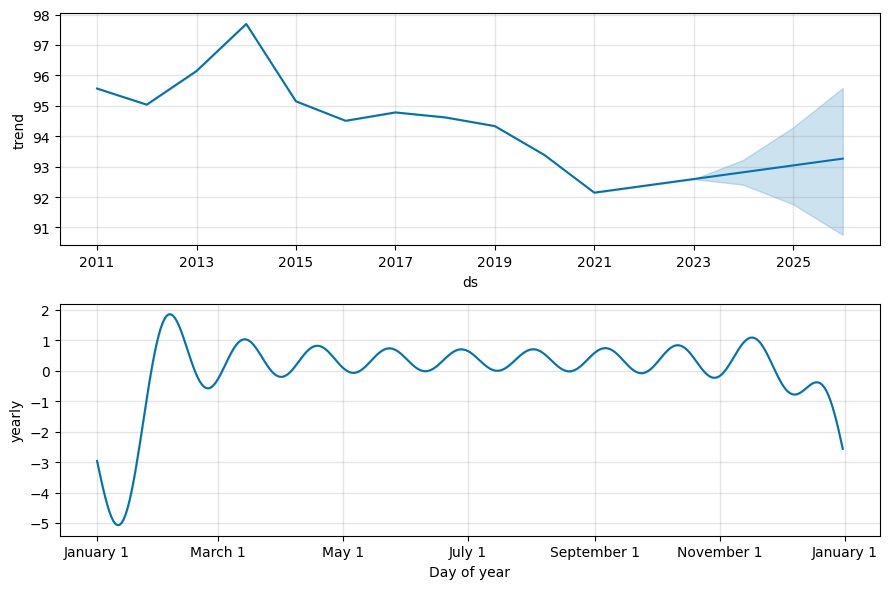


📊 Modelo Prophet para: REPITENCIA


07:06:55 - cmdstanpy - INFO - Chain [1] start processing
07:07:00 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Últimos valores del pronóstico:
           ds       yhat  yhat_lower  yhat_upper
11 2022-01-01   6.998557    4.090080    9.947403
12 2023-01-01   9.015897    6.191069   11.956700
13 2023-12-31  11.439909    8.272147   14.327433
14 2024-12-31  13.077061    9.897883   16.371707
15 2025-12-31  15.120667   11.406165   19.017757
 ✅ Gráfico de pronóstico guardado en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\prophet_forecast_repitencia.png


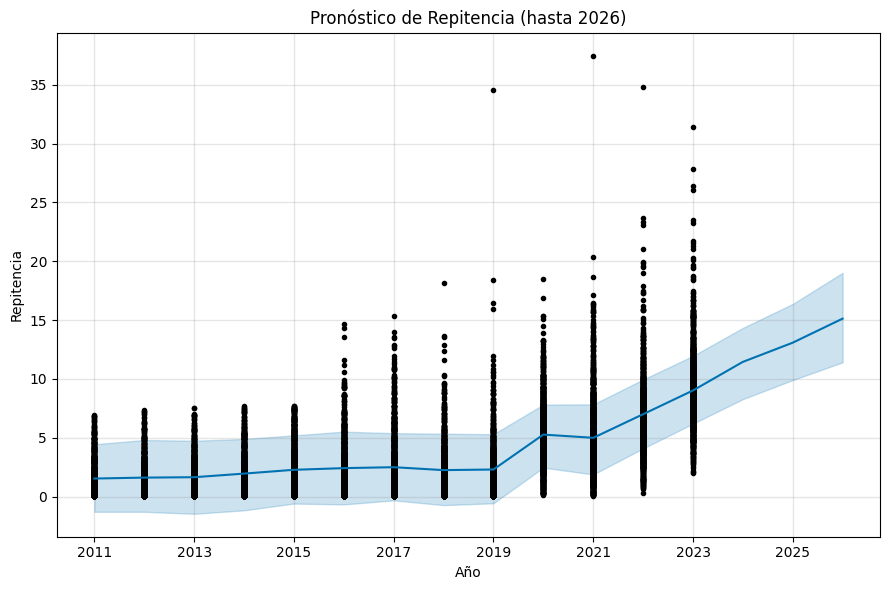

✅ Gráfico de componentes guardado en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\prophet_components_repitencia.png


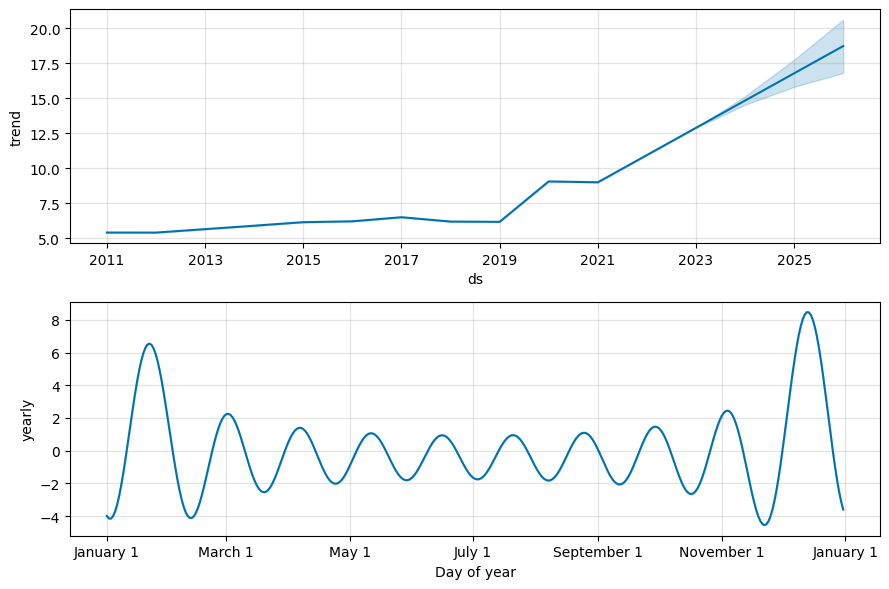


📊 Modelo Prophet para: REPROBACION


07:07:01 - cmdstanpy - INFO - Chain [1] start processing
07:07:03 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Últimos valores del pronóstico:
           ds      yhat  yhat_lower  yhat_upper
11 2022-01-01  6.722890    2.317952   10.846421
12 2023-01-01  6.585717    2.224217   10.732880
13 2023-12-31  6.581351    2.040882   10.613955
14 2024-12-31  6.314595    1.949546   10.704375
15 2025-12-31  6.180567    1.653013   10.577342
 ✅ Gráfico de pronóstico guardado en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\prophet_forecast_reprobacion.png


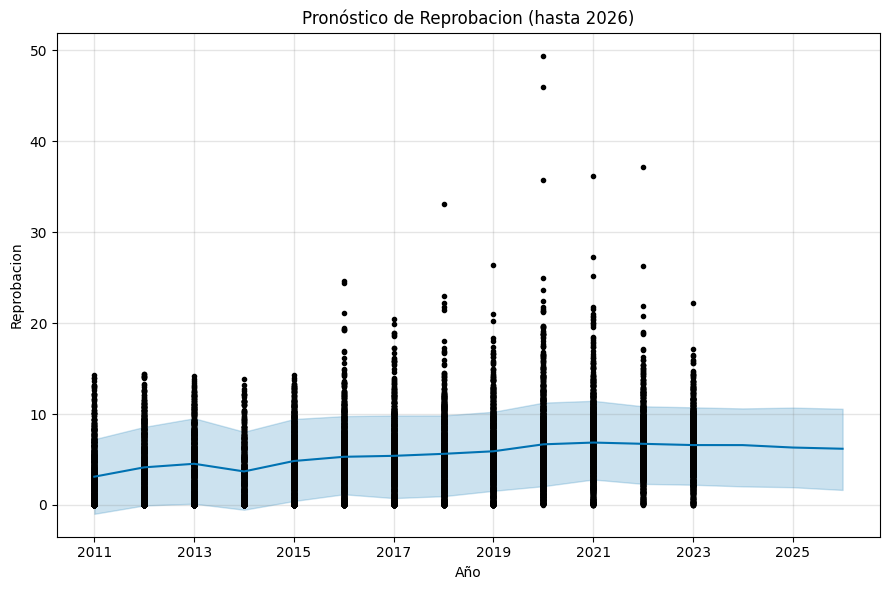

✅ Gráfico de componentes guardado en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\prophet_components_reprobacion.png


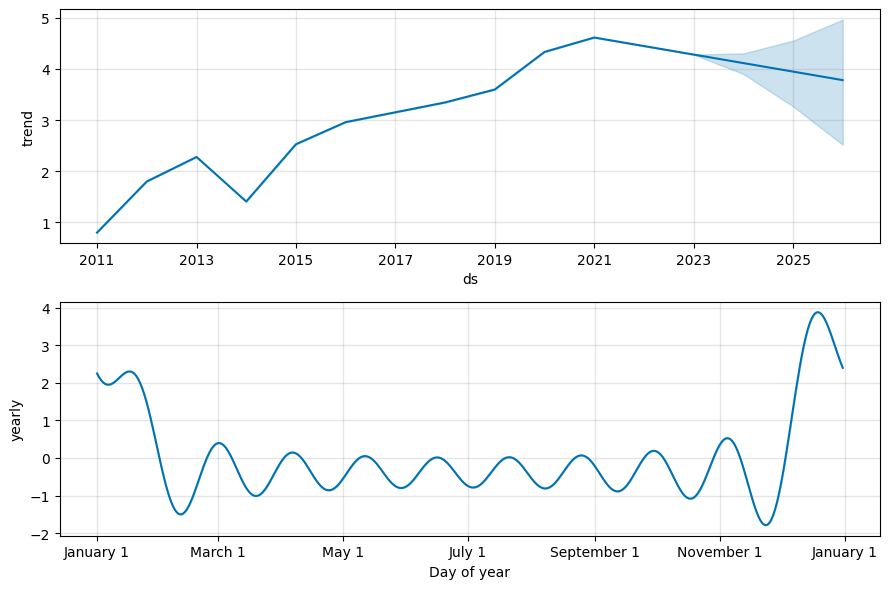


---✅  Pronóstico con Prophet finalizado para todos los indicadores ---

--- Resultados del pronóstico ---

Pronóstico para COBERTURA_NETA:
           ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
13 2023-12-31  100.827238   61.449607  101.496252   100.414064   101.295388   
14 2024-12-31   99.397222   58.992864  101.743821    98.038038   100.925354   
15 2025-12-31   97.971114   57.094484  100.497103    95.374629   100.876060   

    additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
13      -19.608849            -19.608849            -19.608849 -19.608849   
14      -18.982593            -18.982593            -18.982593 -18.982593   
15      -19.199375            -19.199375            -19.199375 -19.199375   

    yearly_lower  yearly_upper  multiplicative_terms  \
13    -19.608849    -19.608849                   0.0   
14    -18.982593    -18.982593                   0.0   
15    -19.199375    -19.199375                   0.0   

    multi

In [3]:
print("\n--- Ejecutando forecast_with_prophet ---")
all_forecasts_results = forecast_with_prophet(
    df=df_cleaned,
    indicators=INDICADORES_BOXPLOTS,
    target_year=2026,
    date_col='anio',
    save_dir=FIGURES_PATH,
    plot_components=True
    )

print("\n--- Resultados del pronóstico ---")
for ind, forecast_df in all_forecasts_results.items():
    print(f"\nPronóstico para {ind.upper()}:")
    print(forecast_df.tail(3)) # Mostrar las últimas 3 filas del pronóstico


### conclusiones

### 6.4 Modelo predictivo ARIMA


--- INICIANDO PRONÓSTICO CON MODELO ARIMA ---
📈 Modelo ARIMA para: COBERTURA_NETA
📈 Modelo ARIMA para: DESERCION
📈 Modelo ARIMA para: APROBACION
📈 Modelo ARIMA para: REPITENCIA
📈 Modelo ARIMA para: REPROBACION
✅ Gráfica general de pronósticos ARIMA guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\arima_forecasts_overview.png


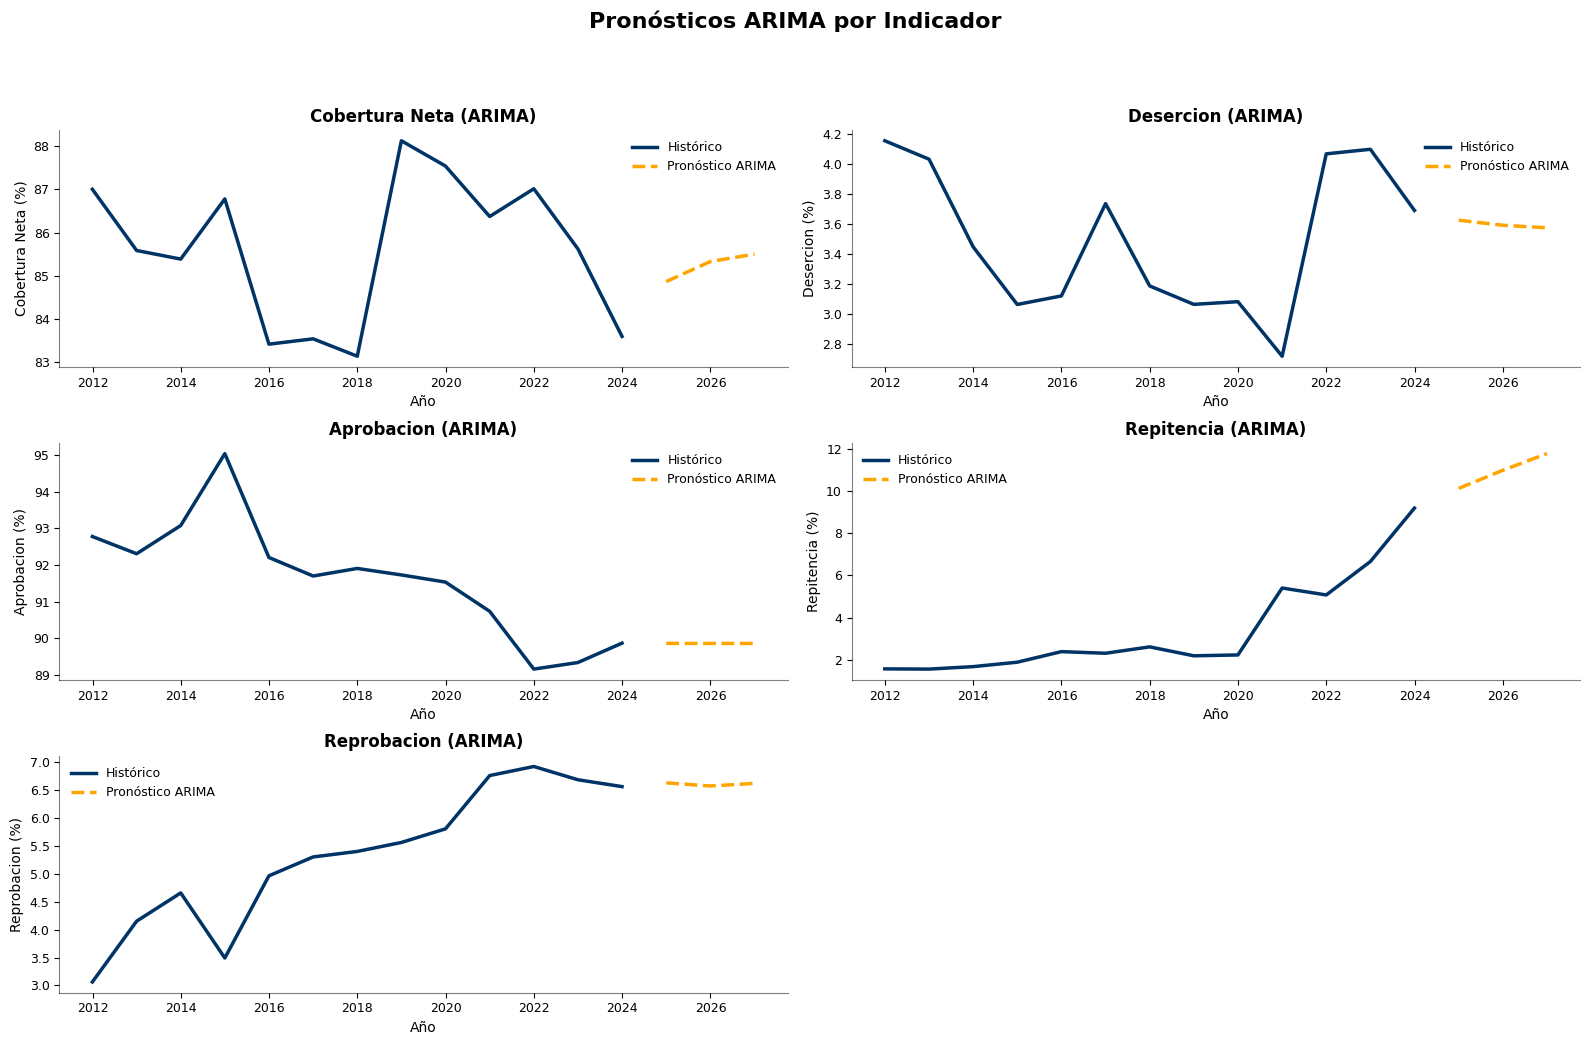


--- Pronóstico con ARIMA finalizado para todos los indicadores ✅---

--- Resultados de pronóstico con ARIMA ---

Pronóstico para COBERTURA_NETA:
2024-12-31    84.866743
2025-12-31    85.330462
2026-12-31    85.500109
Freq: YE-DEC, Name: predicted_mean, dtype: float64

Pronóstico para DESERCION:
2024-12-31    3.627175
2025-12-31    3.593679
2026-12-31    3.576501
Freq: YE-DEC, Name: predicted_mean, dtype: float64

Pronóstico para APROBACION:
2024-12-31    89.865887
2025-12-31    89.863884
2026-12-31    89.863231
Freq: YE-DEC, Name: predicted_mean, dtype: float64

Pronóstico para REPITENCIA:
2024-12-31    10.134734
2025-12-31    10.994705
2026-12-31    11.786158
Freq: YE-DEC, Name: predicted_mean, dtype: float64

Pronóstico para REPROBACION:
2024-12-31    6.633563
2025-12-31    6.577164
2026-12-31    6.624122
Freq: YE-DEC, Name: predicted_mean, dtype: float64


In [4]:
all_arima_forecasts = forecast_with_arima(
    df=df_cleaned,
    indicators= INDICADORES_BOXPLOTS,
    target_year=2026,
    date_col='anio',
    arima_order=(1, 1, 1),
    save_dir=FIGURES_PATH
    )
    
print("\n--- Resultados de pronóstico con ARIMA ---")
for ind, forecast_series in all_arima_forecasts.items():
    print(f"\nPronóstico para {ind.upper()}:")
    if not forecast_series.empty:
        print(forecast_series.tail(3))
    else:
        print("Pronóstico no disponible.")


### 6.5 Modelo de Regresión Lineal


--- INICIANDO PRONÓSTICO CON REGRESIÓN LINEAL ---


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validati

✅ Gráfica general de pronósticos de Regresión Lineal guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\linear_regression_forecasts_overview.png


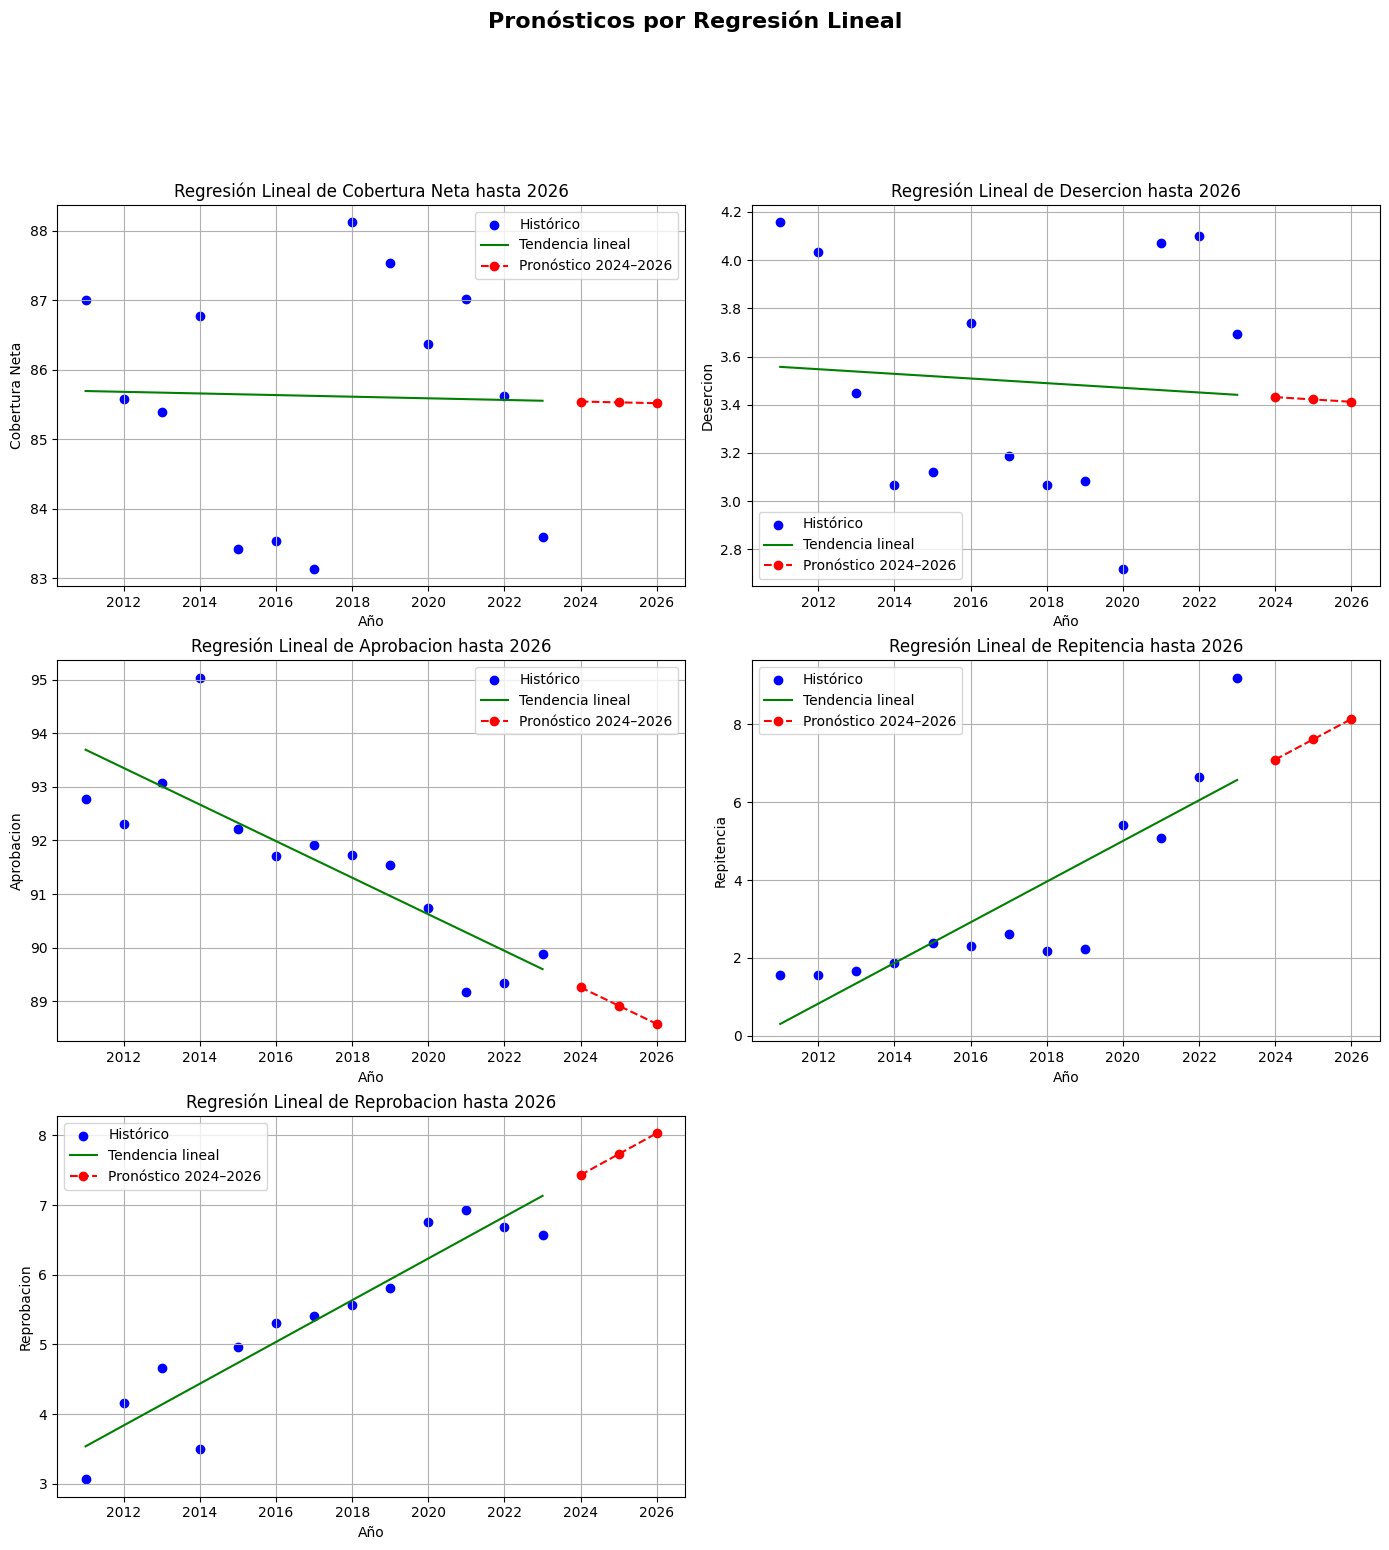


📈 Predicciones para años futuros:
   anio  cobertura_neta_predicha  desercion_predicha  aprobacion_predicha  \
0  2024                    85.54                3.43                89.26   
1  2025                    85.53                3.42                88.92   
2  2026                    85.52                3.41                88.57   

   repitencia_predicha  reprobacion_predicha  
0                 7.10                  7.43  
1                 7.62                  7.73  
2                 8.14                  8.03  

--- Pronóstico con Regresión Lineal finalizado ✅---

--- DataFrame de predicciones de Regresión Lineal ---
   anio  cobertura_neta_predicha  desercion_predicha  aprobacion_predicha  \
0  2024                85.542867            3.431469            89.257378   
1  2025                85.531210            3.421807            88.916165   
2  2026                85.519554            3.412145            88.574953   

   repitencia_predicha  reprobacion_predicha  
0   

In [5]:
lr_predictions_df = forecast_with_linear_regression(
    df=df_cleaned,
    indicators=INDICADORES_BOXPLOTS,
    target_years=[2024, 2025, 2026], # Años objetivo
    date_col='anio',
    figsize=(14, 15), # Ajustar figsize para más subplots
    save_dir=FIGURES_PATH
)
print("\n--- DataFrame de predicciones de Regresión Lineal ---")
print(lr_predictions_df)

### 6.6 ANOVA

In [6]:
temporal_anova_results_df_default = perform_temporal_anova(
    df=df_cleaned,
    indicators_list=INDICADORES_BOXPLOTS,
    date_col='anio',
    alpha=0.05
)
if temporal_anova_results_df_default is not None:
    print("\n--- Resumen de Resultados ANOVA Temporal (Defecto) ---")
    print(temporal_anova_results_df_default.to_string())




--- INICIANDO ANÁLISIS ANOVA PARA VALIDAR BRECHAS ENTRE PERIODOS TEMPORALES ---

--- Resultados ANOVA para: Cobertura Neta ---
  Estadístico F: 13.387
  P-valor: 0.00000
  **Conclusión:** Con un P-valor de 0.00000 (que es menor que 0.05),
  RECHAZAMOS la hipótesis nula (H0). Existen diferencias estadísticamente significativas.
  Esto respalda fuertemente la existencia de brechas temporales en este indicador.

--- Resultados ANOVA para: Desercion ---
  Estadístico F: 39.680
  P-valor: 0.00000
  **Conclusión:** Con un P-valor de 0.00000 (que es menor que 0.05),
  RECHAZAMOS la hipótesis nula (H0). Existen diferencias estadísticamente significativas.
  Esto respalda fuertemente la existencia de brechas temporales en este indicador.

--- Resultados ANOVA para: Aprobacion ---
  Estadístico F: 547.596
  P-valor: 0.00000
  **Conclusión:** Con un P-valor de 0.00000 (que es menor que 0.05),
  RECHAZAMOS la hipótesis nula (H0). Existen diferencias estadísticamente significativas.
  Esto respald

### 6.7 Regresión lineal polinómica


--- Ejecutando forecast_with_polynomial_regression (grado 2) ---

--- INICIANDO PRONÓSTICO CON REGRESIÓN POLINÓMICA (Grado 2) ---


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\

Gráfica general de pronósticos de Regresión Polinómica guardada en: c:\Users\LENOVO\OneDrive\Documentos\python class\Dathon_Academic_MEN\reports\figuras\polynomial_regression_forecasts_degree_2_overview.png


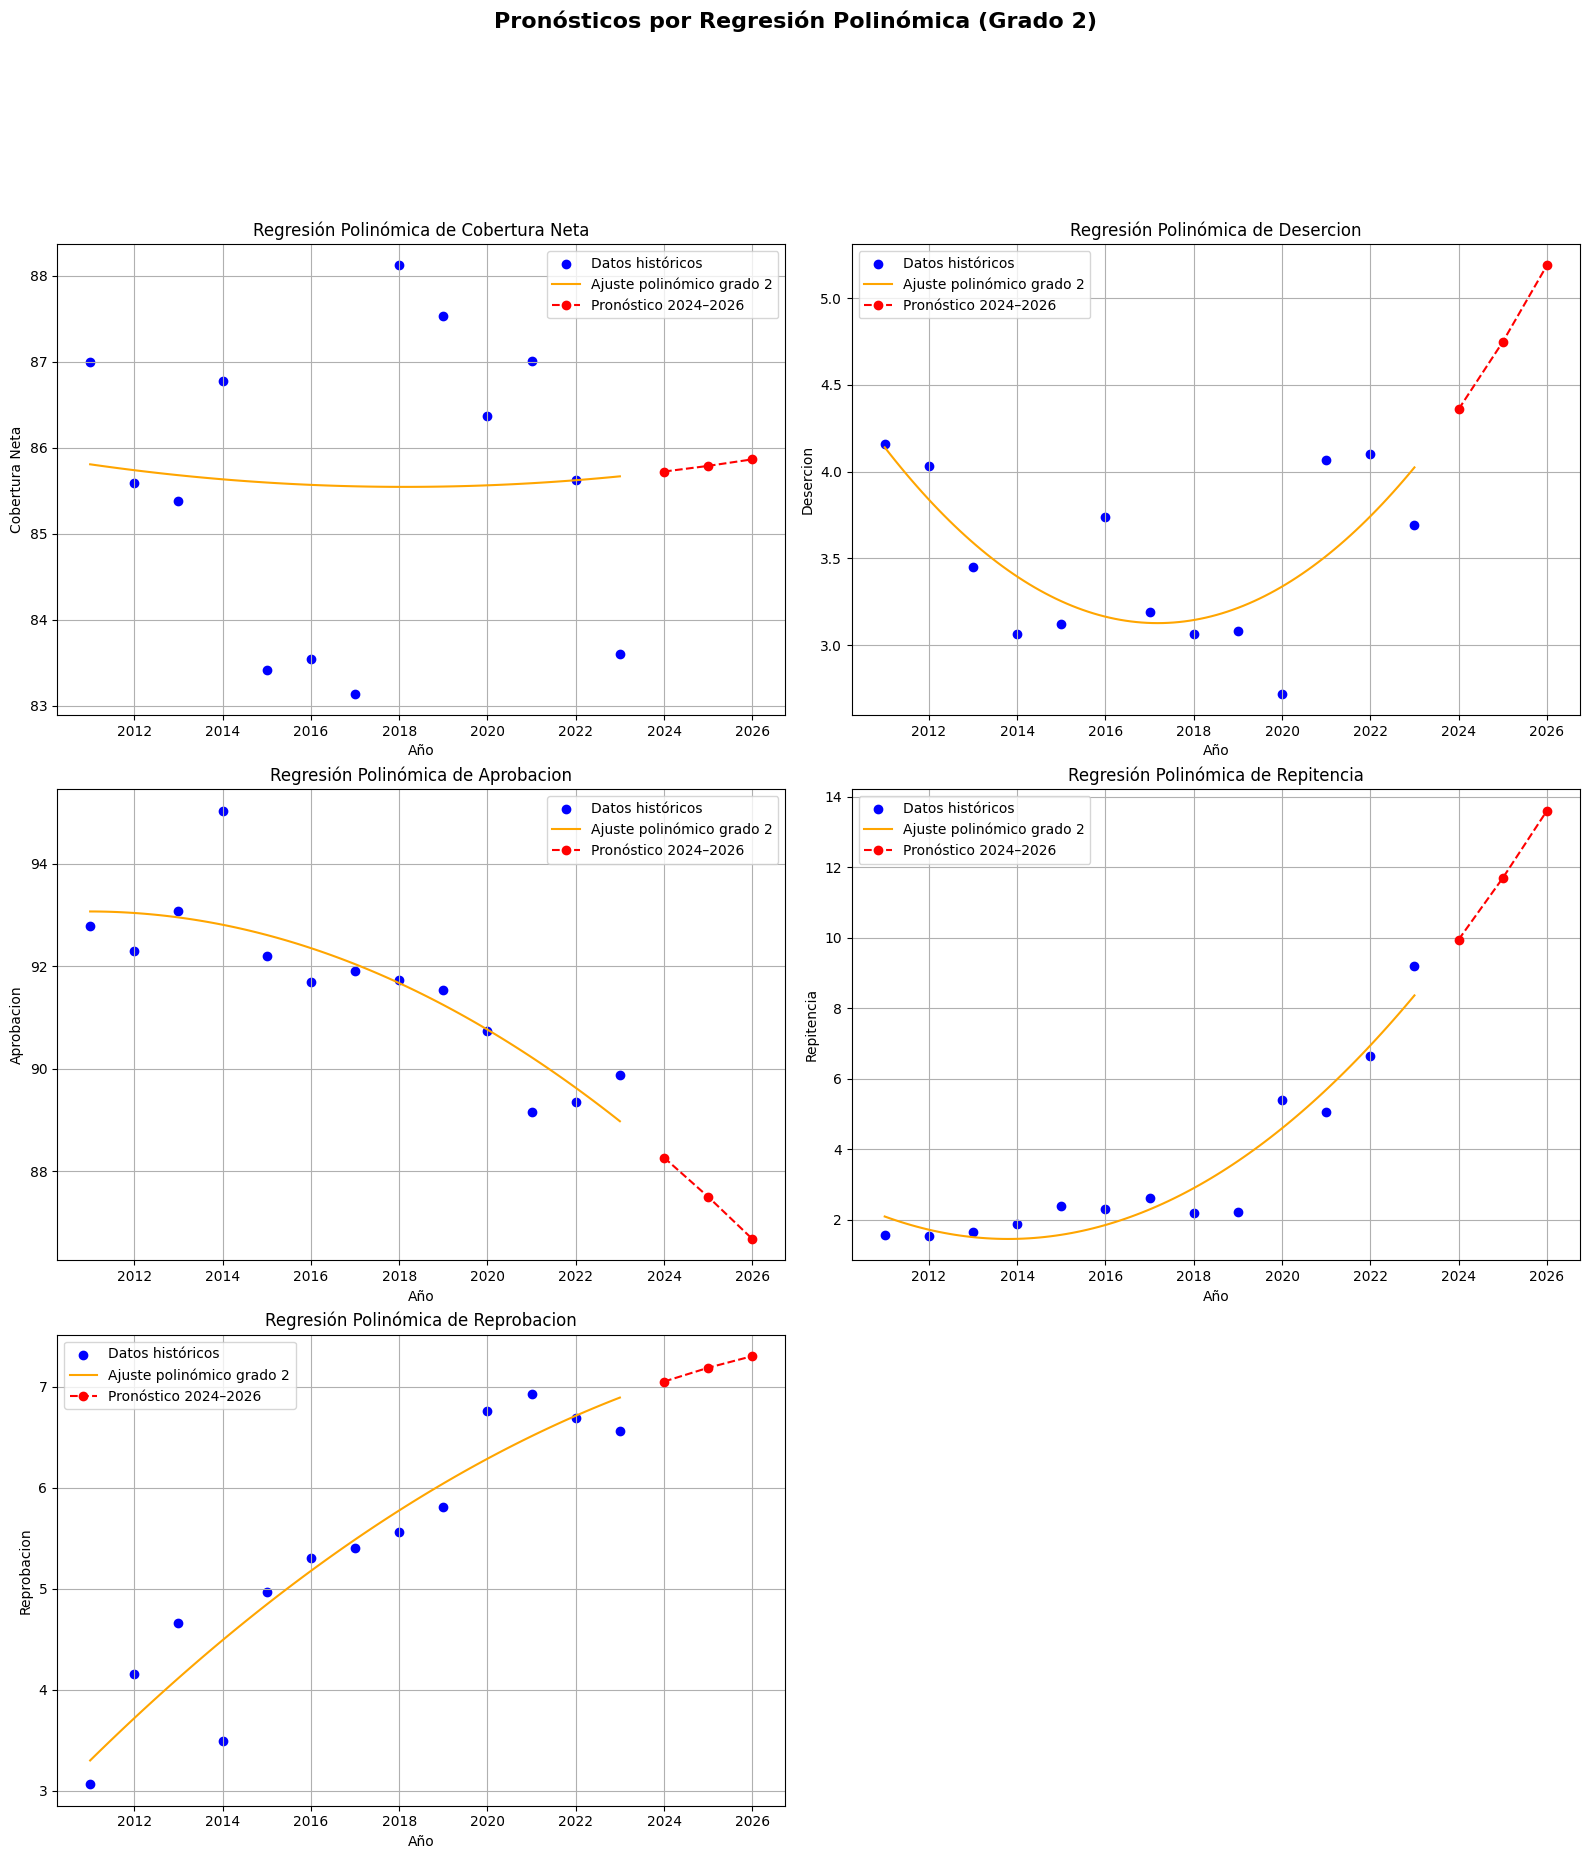


📈 Predicciones polinómicas para 2024–2026:
   anio  cobertura_neta_pred  desercion_pred  aprobacion_pred  \
0  2024                85.72            4.36            88.27   
1  2025                85.79            4.75            87.50   
2  2026                85.87            5.19            86.68   

   repitencia_pred  reprobacion_pred  
0             9.95              7.05  
1            11.70              7.19  
2            13.61              7.31  

--- Pronóstico con Regresión Polinómica finalizado ---

--- DataFrame de predicciones de Regresión Polinómica (Grado 2) ---
   anio  cobertura_neta_pred  desercion_pred  aprobacion_pred  \
0  2024            85.723759        4.359834        88.266620   
1  2025            85.789627        4.748043        87.500796   
2  2026            85.865833        5.189302        86.678358   

   repitencia_pred  reprobacion_pred  
0         9.951555          7.053130  
1        11.697516          7.190069  
2        13.606587          7.305304

In [7]:
print("\n--- Ejecutando forecast_with_polynomial_regression (grado 2) ---")
poly_predictions_df_2 = forecast_with_polynomial_regression(
    df=df_cleaned,
    indicators=INDICADORES_BOXPLOTS,
    target_years=[2024, 2025, 2026],
    date_col='anio',
    degree=2,
    figsize=(16, 18), # Ajustar tamaño para que quepan todos los subplots
    save_dir=FIGURES_PATH
)
print("\n--- DataFrame de predicciones de Regresión Polinómica (Grado 2) ---")
print(poly_predictions_df_2)